This analysis is borrowed from Josh Starmer
- https://www.youtube.com/watch?v=Lsue2gEM9D0
- https://github.com/StatQuest/pca_demo/blob/master/pca_demo.py

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import random as rd

In [4]:
from sklearn.decomposition import PCA

In [5]:
from sklearn import preprocessing

In [6]:
import pylab

In [12]:
genes = ['gene' + str(i) for i in range(1, 101)]

In [13]:
wt = ['wt' + str(i) for i in range(1,6)]
ko = ['ko' + str(i) for i in range(1,6)]

In [14]:
data = pd.DataFrame(columns=[*wt, *ko], index=genes)
data

,wt1,wt2,wt3,wt4,wt5,ko1,ko2,ko3,ko4,ko5
gene1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gene2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gene3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gene4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gene5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
gene96,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gene97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gene98,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gene99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
for gene in data.index:
    data.loc[gene,'wt1':'wt5'] = np.random.poisson(lam=rd.randrange(10,1000), size=5)
    data.loc[gene,'ko1':'ko5'] = np.random.poisson(lam=rd.randrange(10,1000), size=5)

In [16]:
data

,wt1,wt2,wt3,wt4,wt5,ko1,ko2,ko3,ko4,ko5
gene1,342,316,359,326,287,122,140,141,119,132
gene2,99,107,98,82,94,989,921,875,931,929
gene3,535,526,522,518,491,618,608,607,597,634
gene4,110,115,117,119,104,165,167,154,176,159
gene5,204,224,227,204,209,613,612,576,575,556
...,...,...,...,...,...,...,...,...,...,...
gene96,47,43,51,47,41,601,539,544,536,641
gene97,560,548,525,545,549,113,113,104,114,112
gene98,305,285,311,314,289,401,446,410,455,450
gene99,903,896,883,933,868,188,175,184,182,196


In [18]:
scaled_data = preprocessing.scale(data.T)
scaled_data

array([[ 1.14386016, -0.9908234 , -0.62256879, -1.08265006, -1.04696433,
         1.17174578,  0.6328236 , -0.98418863,  1.0624641 ,  0.95008692,
         0.91354956,  0.83623125, -0.38919636,  1.10550553,  0.35758187,
        -0.8326522 , -0.97187452,  0.90049925,  0.9069355 ,  1.072677  ,
        -0.95570246,  0.9564585 ,  0.92846115, -1.00538013, -0.95626118,
        -1.00282644, -1.02101049,  1.05804984,  0.34566187, -0.99038388,
        -1.08418571, -1.1908879 ,  0.87569833,  1.04290533, -0.97611538,
        -1.38520873,  0.83593629,  0.58931541,  0.98175801,  0.83060969,
         0.75234515,  1.07725744, -1.03040242,  0.68034413,  0.04401796,
        -1.02418676, -1.04993904, -0.46712211,  1.11337008, -0.98667118,
         0.95814136,  1.10261992, -1.02035487, -1.06551131,  0.81064252,
        -0.97046879,  0.89691155, -0.98932324, -0.69370308,  1.02894605,
        -0.98989516,  0.34081146, -0.13726468,  0.87062774,  0.96751046,
         0.76891371,  0.28636244,  1.0167101 , -1.1

In [19]:
pca = PCA()

In [20]:
pca.fit(scaled_data)

PCA()

In [21]:
pca_data = pca.transform(scaled_data)

In [22]:
pca.explained_variance_ratio_

array([8.68953436e-01, 4.30541244e-02, 2.36670723e-02, 1.99848730e-02,
       1.31541652e-02, 1.07934635e-02, 9.72185488e-03, 6.32173829e-03,
       4.34927243e-03, 3.02775315e-33])

In [23]:
per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]

Text(0.5, 1.0, 'Scree Plot')

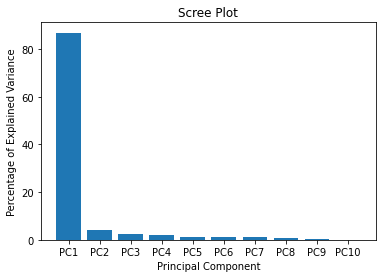

In [24]:
pylab.bar(x=range(1, len(per_var) + 1), height=per_var, tick_label=labels)
pylab.ylabel('Percentage of Explained Variance')
pylab.xlabel('Principal Component')
pylab.title('Scree Plot')

In [25]:
pca_df = pd.DataFrame(pca_data, index=[*wt, *ko], columns=labels)

In [26]:
pca_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
wt1,8.794651,-2.117185,0.021547,-0.982261,-0.791329,-0.106862,-0.351297,1.127795,1.312409,1.921894e-16
wt2,9.481137,-2.460394,0.135521,-0.336473,-1.555301,-0.663839,-0.759008,-1.069529,-0.895991,4.306085e-16
wt3,9.783780,3.862802,-1.650219,-0.757253,0.921366,-1.384750,-0.085238,-0.498332,0.274246,2.944917e-16
wt4,9.057620,-0.491959,0.945477,-0.910549,1.682162,2.182940,0.348665,-0.561692,-0.085719,1.263596e-15
wt5,9.460441,0.912088,0.559538,2.940721,-0.204873,-0.012316,0.914807,1.033425,-0.565435,-4.916252e-16
ko1,-9.765669,-2.037094,-2.185307,0.705677,-0.115463,-0.049625,1.815487,-0.741412,0.416797,8.179377e-17
ko2,-8.916942,1.237805,-2.426474,0.317736,-0.595681,1.418018,-1.548109,0.481401,-0.313749,1.143123e-16
ko3,-9.412086,-1.438258,1.438605,1.619429,1.723358,-0.951088,-1.343169,-0.275900,0.323978,9.143458e-16
ko4,-8.944856,2.934397,2.577687,-0.234867,-1.646574,0.352587,0.342654,-0.550822,0.450775,2.050309e-16
ko5,-9.538075,-0.402203,0.583625,-2.362161,0.582335,-0.785064,0.665207,1.055065,-0.917312,-9.869111e-16


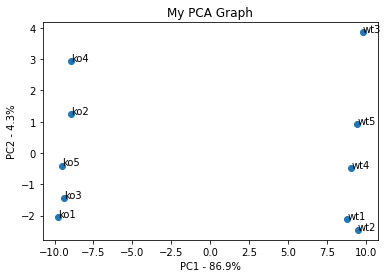

In [27]:
pylab.scatter(pca_df['PC1'], pca_df['PC2'])
pylab.title('My PCA Graph')
pylab.xlabel('PC1 - {0}%'.format(per_var[0]))
pylab.ylabel('PC2 - {0}%'.format(per_var[1]))

for sample in pca_df.index:
    pylab.annotate(sample, (pca_df.PC1.loc[sample], pca_df.PC2.loc[sample]))

In [28]:
loading_scores = pd.Series(pca.components_[0], index=genes)

In [29]:
sorted_loading_scores = loading_scores.abs().sort_values(ascending=False)

In [30]:
top_10_genes = sorted_loading_scores[0:10].index.values

In [31]:
print(loading_scores[top_10_genes])

gene56   -0.107230
gene58   -0.107198
gene77   -0.107179
gene35   -0.107176
gene11    0.107142
gene27   -0.107131
gene34    0.107112
gene50   -0.107108
gene73    0.107100
gene90    0.107086
dtype: float64
